## פרוייקט על צריכת סמים שונים והשפעתם

<img src="" width=700 height=700 align=left />

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/Itamar-Melnik/My-project/raw/main/Drug_Consumption.csv'
drug_df = pd.read_csv(url)
drug_df.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0


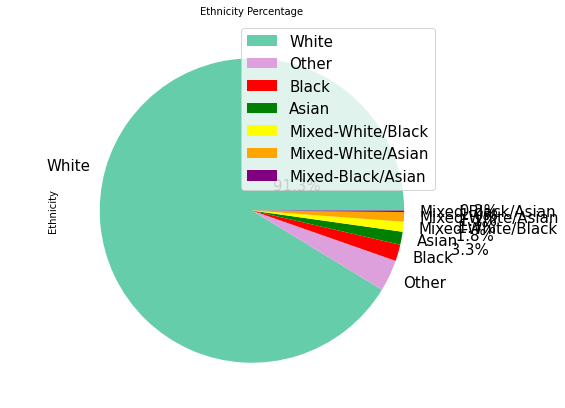

In [44]:
plt.figure(figsize=(10, 7))
plt.title("Ethnicity Percentage",fontsize=10)
plotpie=drug_df['Ethnicity'].value_counts().plot.pie(autopct='%60.1f%%',colors = ['mediumaquamarine', 'plum','red','green','yellow','orange','purple'],fontsize=15)
plt.legend(fontsize=15)

#### כאן ניתן לראות שמרבית האנשים במחקר הם ממוצא לבן (1720 מתוך 1884)

In [3]:
drug_df.Ethnicity.describe()

count      1884
unique        7
top       White
freq       1720
Name: Ethnicity, dtype: object

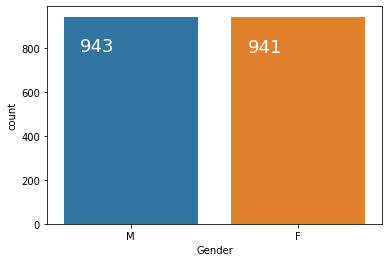

In [4]:
ax=sns.countplot(x=drug_df['Gender'], data = drug_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.2,p.get_height()),ha='center',va='top',color='white',size=18)

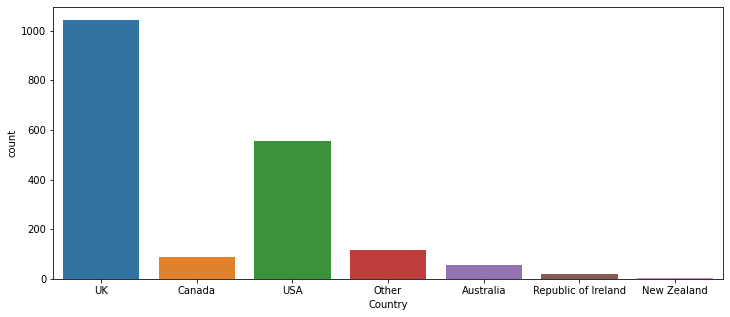

In [5]:
fig, axes = plt.subplots(figsize=(12, 5))
ax2 = sns.countplot(x='Country', data = drug_df)

יצרנו עמודה חדשה שמחברת את כל סוגי הסמים הקשים שנעבוד איתם, לעמודה אחת בה מופיעה רמת הצריכה המקסימלית מסם קשה כלשהו

In [6]:
drug_df['heavy_dr']=drug_df\
[['Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer']].max(axis=1)

<AxesSubplot:xlabel='heavy_dr', ylabel='count'>

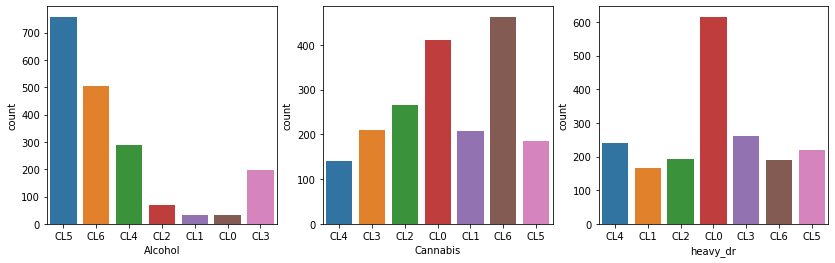

In [7]:
fig, axes = plt.subplots(figsize=(14, 4),ncols=3)
sns.countplot(data=drug_df, x='Alcohol',ax=axes[0])
sns.countplot(x="Cannabis", data=drug_df, ax=axes[1])
sns.countplot(x='heavy_dr',data=drug_df, ax=axes[2])

#### כאן אנחנו מציגים את רמת הצריכה של סמים קלים(קנאביס), אלכוהול וסמים קשים

### כאן נציג את פילוח ההשכלה בקרב האנשים שבמחקר

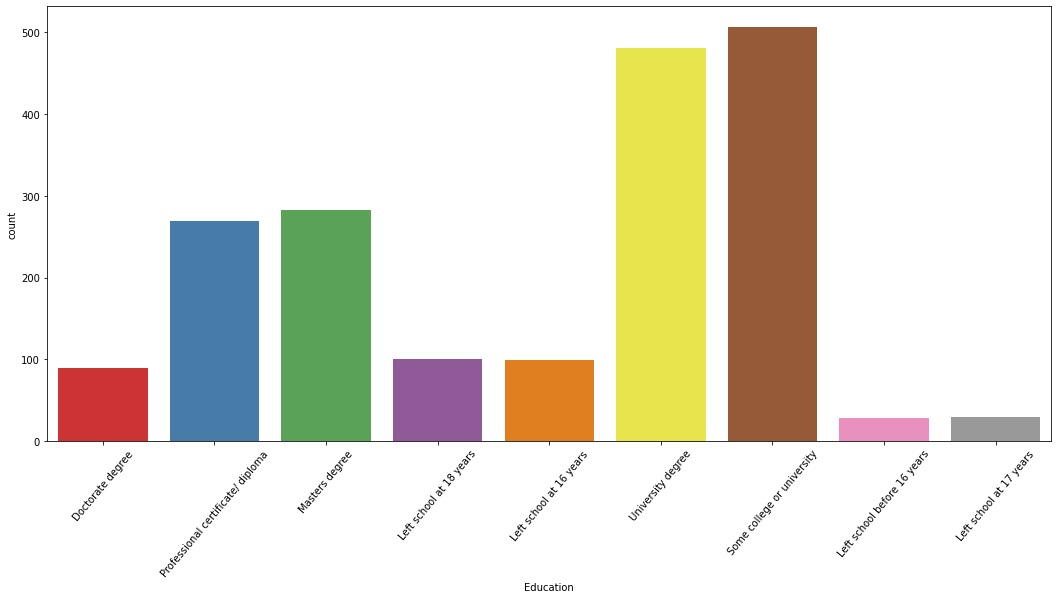

In [8]:
drug_df=drug_df.replace(['Some college or university, no certificate or degree'],['Some college or university'])
plt.figure(figsize=(18,8))
chart = sns.countplot(data=drug_df,x='Education',palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation=50)
None

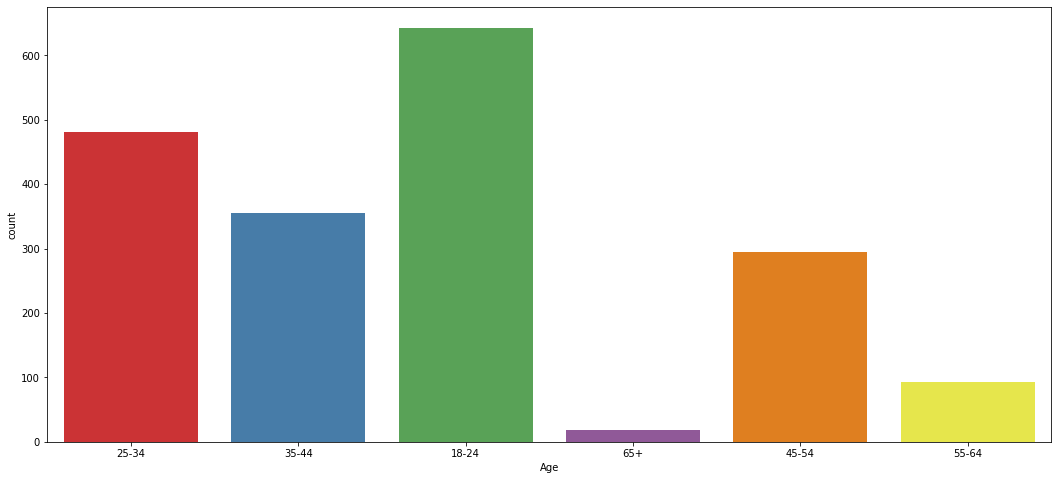

In [9]:
plt.figure(figsize=(18,8))
chart = sns.countplot(data=drug_df,x='Age',palette='Set1')

### החלפת הנתונים למספריים כך שנוכל לעבוד איתם בהמשך

In [10]:
drug_df = drug_df.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])
drug_df=drug_df.replace(['18-24','25-34','35-44','45-54','55-64','65+'],[21,30,40,50,60,70])
#drug_df=drug_df.replace(['F','M'],[0,1])

<AxesSubplot:>

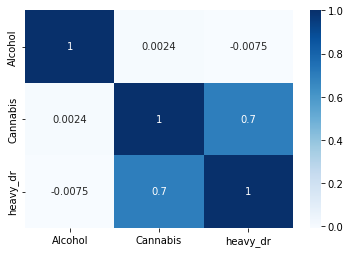

In [11]:
drug_df['heavy_dr']=drug_df\
[['Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer']].max(axis=1)
corr_data = drug_df[['Alcohol','Cannabis','heavy_dr']].corr(method='spearman')
sns.heatmap(data=corr_data,cmap='Blues', annot=True)

### יש קשר ישיר בין צריכת קנאביס לצריכת סמים קשים, כלומר ככל שבנאדם צורך יותר קנאביס כך הסיכוי שלו לצרוף סמים קשים עולה.
### לא נמצא קשר בין צריכת אלכוהול לצריכת סמים קלים או קשים. 

#### נבדוק קורולציה בין צריכת סמים לגיל

<AxesSubplot:xlabel='Age', ylabel='heavy_dr'>

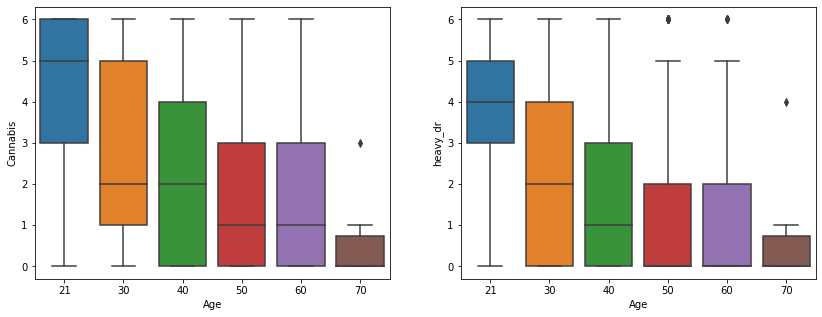

In [12]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Age' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Age' ,y= 'heavy_dr',ax=axes[1])

### יש קורלציה בין גיל לשימוש בסמים קשים וגם לצריכת קנאביס. ע"פ הגרפים מלמעלה, ניתן לראות כי ככל שהגיל צעיר יותר יש נטייה גבוהה יותר לצרוך סמים.

#### נשווה בין מין לצריכת סמים

<AxesSubplot:xlabel='Gender', ylabel='heavy_dr'>

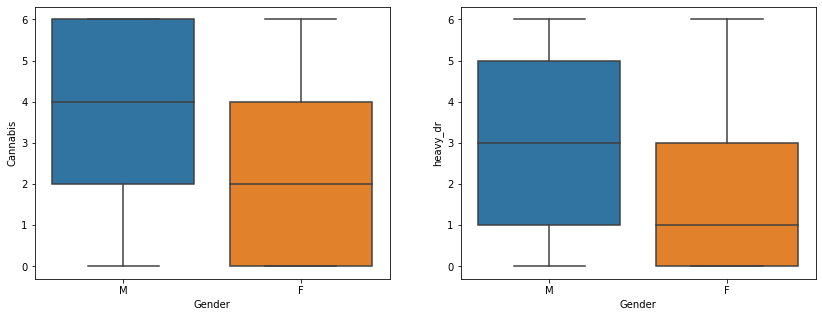

In [13]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'heavy_dr',ax=axes[1])

### בהשוואה בין גברים לנשים, ניתן לראות כי גברים באופן כללי נוטים לצרוך יותר סמים מנשים.

לבין צריכת סמים (Oscore) נשווה בין פתיחות לחוויות

<AxesSubplot:xlabel='Cannabis', ylabel='Oscore'>

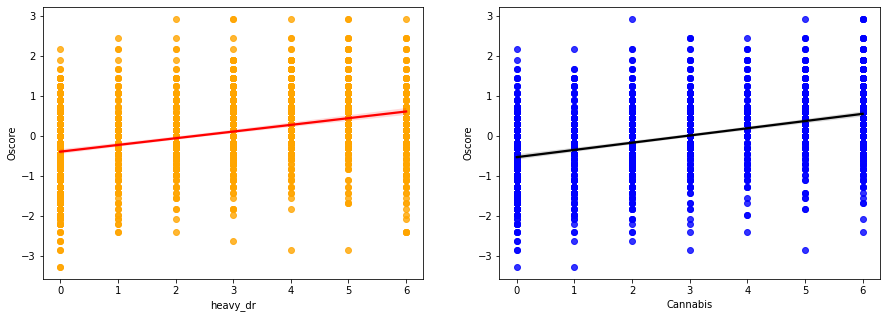

In [14]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data=drug_df, x='heavy_dr', y='Oscore',scatter_kws={"color": "orange"}, line_kws={"color": "red"},ax=axes[0])
sns.regplot(data=drug_df, x='Cannabis', y='Oscore',scatter_kws={"color": "blue"}, line_kws={"color": "black"},ax=axes[1])

### פתיחותת לחוויות משפיעה באופן ישיר על כמות צריכת סמים

נשווה בין מדינות לבין צריכת סמים

<AxesSubplot:xlabel='Country', ylabel='Cannabis'>

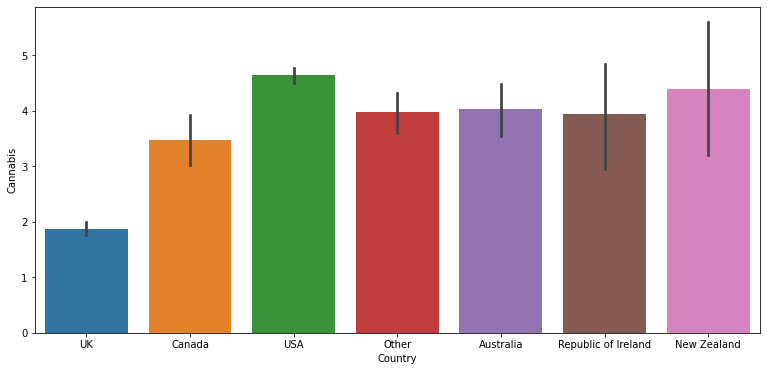

In [15]:
plt.figure(figsize=(13,6))
sns.barplot(data=drug_df,x='Country',y='Cannabis')

### ניתן לראות שבמדינות בהן יש לגיליזציה(אישור לצרוך קנאביס) יש רמת צריכה גבוהה יותר ביחס למדינות בהן אין לגיליזציה, לכן ניתן להניח שלגיליזציה גורמת לעלייה בצריכת השימוש בקנאביס.

נבדוק באיזה שלב אקדמאי בחיים צריכת הסמים גבוהה ביותר

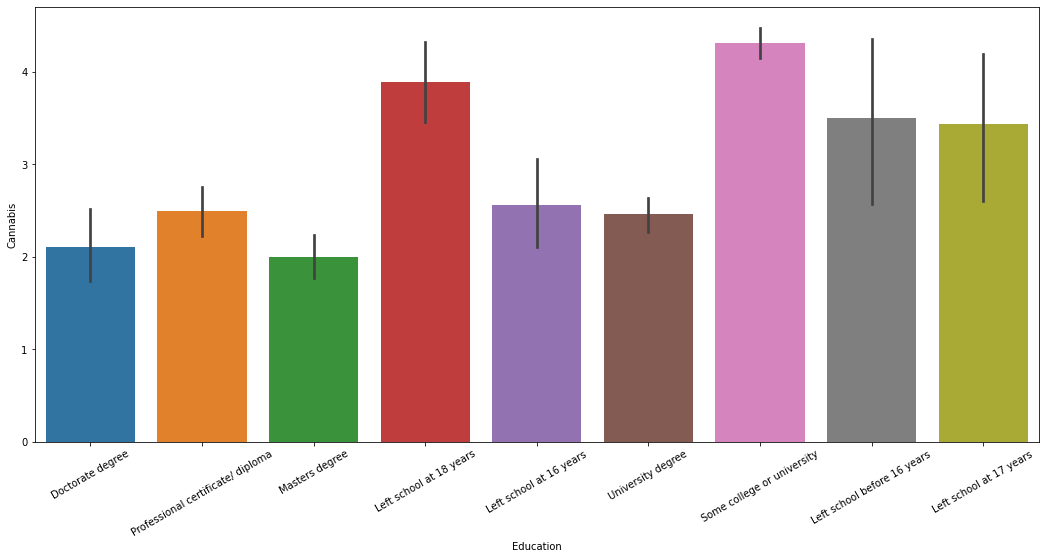

In [16]:
plt.figure(figsize=(18,8))
sns.barplot(data=drug_df,x='Education',y='Cannabis')
plt.xticks(rotation=30)
None

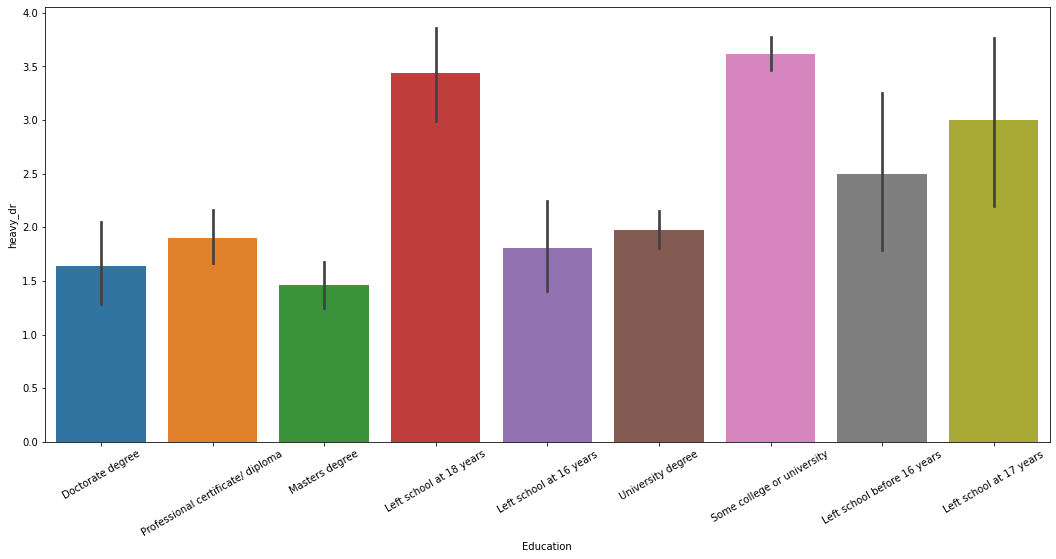

In [17]:
plt.figure(figsize=(18,8))
sns.barplot(data=drug_df,x='Education',y='heavy_dr')
plt.xticks(rotation=30)
None

### התקופה של יציאה מבית ספר ותחילת התואר היא התקופה שאנשים צורכים הכי הרבה סמים
### ניתן להניח ש 